## Implementing Linear Regression from scratch using Adam in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating features
np.random.seed(100)
x = tf.constant(np.random.randint(100, size =(10,1)), dtype = tf.float32)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 8.],
       [24.],
       [67.],
       [87.],
       [79.],
       [48.],
       [10.],
       [94.],
       [52.],
       [98.]], dtype=float32)>

In [3]:
# Generating lables with w and b.
# w1 = 1  w2 = 3   b = 5
w = [2]
b = -5

# y = w1*x1 + w2*x2 + b 
m = tf.constant(np.asarray([w]), dtype = tf.float32)
b = tf.constant(b, dtype = tf.float32)
y = tf.squeeze(tf.matmul(m,x, transpose_b = True) + b)
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 11.,  43., 129., 169., 153.,  91.,  15., 183.,  99., 191.],
      dtype=float32)>

Text(0, 0.5, 'Y')

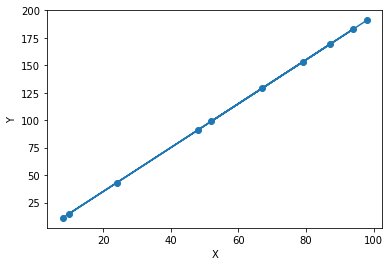

In [4]:
# visualizing the data for univariate
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")


In [5]:
# Computing rmse loss function
def compute_rmse(y_label, y_pred):
    return tf.sqrt(tf.reduce_mean(((y_label - y_pred)**2)))

def compute_mse(y_label, y_pred):
    return tf.reduce_mean(((y_label - y_pred)**2))


In [6]:
# Computing gradients
def gradients_mse(X, Y, Y_PREDS):
    DW1 = tf.matmul(X, tf.reshape(Y-Y_PREDS, (X.shape[0],1)), transpose_a = True) * (-2/X.shape[0])
    DW0 = (-2 / X.shape[0]) * tf.reduce_sum(Y - Y_PREDS)
    return DW1, DW0
    

In [7]:
w_vector = np.random.uniform(-2,2, size =(x.shape[1],1))

In [13]:
EPOCHS = 100

w3 = tf.Variable(w_vector, dtype = tf.float32)
w4 = tf.Variable(0, dtype = tf.float32)

# w1 = tf.Variable(w_vector, dtype = tf.float32)
# w0 = tf.Variable(0, dtype = tf.float32)
lr = 0.001
LOSS = []


learning_rate_power=-0.5
initial_accumulator_value=0.1
l1_regularization_strength=0.0
l2_regularization_strength=0.0
l2_shrinkage = 0.0

accum_w3 = tf.constant(np.ones(w3.shape) * initial_accumulator_value, dtype = tf.float32)
accum_w4 = tf.constant(np.ones(w4.shape) * initial_accumulator_value, dtype = tf.float32)

linear_dw3 = tf.constant(np.zeros(w3.shape), dtype = tf.float32)
linear_dw4 = tf.constant(np.zeros(w4.shape), dtype = tf.float32)

epilson = 1e-8


for epoch in range(1,EPOCHS+1):
#     with tf.GradientTape() as tape:
#         y_pred = tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)
#         loss = compute_mse(y, y_pred)
    
#     gradients = tape.gradient(loss, [w1, w0])
#     w1.assign_sub(gradients[0] * lr)
#     w0.assign_sub(gradients[1] * lr)
    
    
    
#     Computing with equations for mse loss function
    print(epoch)
    y_pred1 = tf.squeeze(tf.matmul(w3,x, transpose_a = True, transpose_b = True) + w4)
    loss = compute_mse(y, y_pred1)
    
    print('Loss : {}'.format(loss.numpy()))
    dw3, dw4 = gradients_mse(x, y, y_pred1)
    
#     print('dw1 : {}'.format(gradients[0]))
#     print('dw2 : {}'.format(gradients[1]))
    print('dw3 : {}'.format(dw3))
    print('dw4 : {}'.format(dw4))
    
#     dw3s = dw3 + 2 * l2_shrinkage * w3
#     dw4s = dw4 + 2 * l2_shrinkage * w4
    
    accum_new_w3 = accum_w3 + tf.square(dw3)
    accum_new_w4 = accum_w4 + tf.square(dw4)
    
    print('accum_new_w3 : {}'.format(accum_new_w3))
    print('accum_new_w4 : {}'.format(accum_new_w4))
    
    linear_dw3 += dw3 - (tf.pow(accum_new_w3, -learning_rate_power) - tf.pow(accum_w3, -learning_rate_power)) / lr * w3
    linear_dw4 += dw4 - (tf.pow(accum_new_w4, -learning_rate_power) - tf.pow(accum_w4, -learning_rate_power)) / lr * w4
    
    print('linear_dw3 : {}'.format(linear_dw3))
    print('linear_dw4 : {}'.format(linear_dw4))
    
    dw3x = tf.math.sign(linear_dw3) * l1_regularization_strength - linear_dw3
    dw4x = tf.math.sign(linear_dw4) * l1_regularization_strength - linear_dw4
    
    dw3y = tf.pow(accum_new_w3,learning_rate_power) / lr + 2 * l2_regularization_strength
    dw4y = tf.pow(accum_new_w4,learning_rate_power) / lr + 2 * l2_regularization_strength
    
    dw3ps = dw3x / dw3y
    dw4ps = dw4x / dw4y
    
    
    
#     quadratic_dw3 = (1 / ( tf.pow(accum_new_w3,learning_rate_power) * lr)) + 2 * l2_regularization_strength
#     quadratic_dw4 = (1 / ( tf.pow(accum_new_w4,learning_rate_power) * lr)) + 2 * l2_regularization_strength
    
#     print('quadratic_dw3 : {}'.format(quadratic_dw3))
#     print('quadratic_dw4 : {}'.format(quadratic_dw4))
    
    m3 = tf.cast(tf.math.abs(linear_dw3) > l1_regularization_strength, tf.float32)
    m4 = tf.cast(tf.math.abs(linear_dw4) > l1_regularization_strength, tf.float32)
    
    print('m3 : {}'.format(m3))
    print('m4 : {}'.format(m4))
    
    tw3 = dw3ps * m3
    tw4 = dw4ps * m4
    
    
    print('tw3 : {}'.format(tw3))
    print('tw4 : {}'.format(tw4))

    
    accum_w3 += tf.square(dw3)
    accum_w4 += tf.square(dw4)
    
#     print(tw3)
#     print(w3)
    
    w3.assign(tw3)
    w4.assign(tw4)
    
    
    LOSS.append(loss)
    
    print('================================')
    
    
    
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy(), gradients[1].numpy()))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy(), dw4.numpy()))
#     print()
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy() * lr, gradients[1].numpy() * lr))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy() * lr, dw4.numpy() * lr))
#     print()
#     print("After Epoch: {} w1: {} w0: {}".format(epoch, w1.numpy(), w0.numpy()))
#     print("After Epoch: {} w3: {} w4: {}".format(epoch, w3.numpy(), w4.numpy()))
#     print('Loss Tensorflow = {} Loss Equation = {}'.format(loss, compute_mse(y, y_pred1)))
#     print('---------------------------------------------------------------\n')
    
    
    
print('Final Results')
print('================================')
# print('w1 : {}'.format(w1.numpy()))
# print('w0 : {}'.format(w0.numpy()))
print('w3 : {}'.format(w3.numpy()))
print('w4 : {}'.format(w4.numpy()))
print('Final Loss : {}'.format(LOSS[-1]))

    


    
    

    

    
    

1
Loss : 43170.96484375
dw3 : [[-27084.656]]
dw4 : -359.0185241699219
accum_new_w3 : [[7.335786e+08]]
accum_new_w4 : 128894.3984375
linear_dw3 : [[33940236.]]
linear_dw4 : -359.0185241699219
m3 : [[1.]]
m4 : 1.0
tw3 : [[-9.192597e+08]]
tw4 : 128.8943634033203
2
Loss : 3.5903143774610564e+21
dw3 : [[-7.8113176e+12]]
dw4 : -104244051968.0
accum_new_w3 : [[6.1016683e+25]]
accum_new_w4 : 1.0866822235175097e+22
linear_dw3 : [[7.1806286e+24]]
linear_dw4 : -1.3436573257302016e+16
m3 : [[1.]]
m4 : 1.0
tw3 : [[-5.609017e+34]]
tw4 : 1.4006828947949776e+24
3
Loss : inf
dw3 : [[-inf]]
dw4 : -6.360625766584575e+36
accum_new_w3 : [[inf]]
accum_new_w4 : inf
linear_dw3 : [[nan]]
linear_dw4 : -inf
m3 : [[0.]]
m4 : 1.0
tw3 : [[nan]]
tw4 : inf
4
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
5
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
lin

m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
47
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
48
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
49
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
50
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
51
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
52
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
t

m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
95
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
96
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
97
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
98
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
99
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0
tw3 : [[nan]]
tw4 : nan
100
Loss : nan
dw3 : [[nan]]
dw4 : nan
accum_new_w3 : [[nan]]
accum_new_w4 : nan
linear_dw3 : [[nan]]
linear_dw4 : nan
m3 : [[0.]]
m4 : 0.0


In [20]:
# using keras to get same results
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units = 1,  name = 'd1', input_shape = (x.shape[1],)))
    
    model.compile(optimizer=tf.keras.optimizers.Ftrl(),
                loss="mse")
    
    return model
model = create_model()

d1 = model.get_layer('d1')
d1_weights = [tf.constant(w_vector, dtype = tf.float32), tf.constant(np.array([0]), dtype = tf.float32)]
d1.set_weights(d1_weights)
d1.weights

history = model.fit(x, y, epochs = 1000,batch_size = 100, verbose = 0)
d1 = model.get_layer('d1')
print('w3 = {}'.format(d1.weights[0].numpy()))
print('w4 = {}'.format(d1.weights[1].numpy()[0]))
print('Final Loss : {}'.format(history.history['loss'][-1]))

w3 = [[-1.1925268]]
w4 = 0.061586640775203705
Final Loss : 41497.71875


Text(0, 0.5, 'Loss')

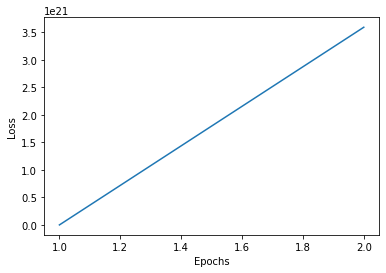

In [17]:
plt.plot(range(1,len(LOSS)+1), LOSS)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [18]:
def predict(x, w1, w0):
    return tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)

predict(x,w1, w0)

    

NameError: name 'w1' is not defined

In [ ]:
quadratic_dw3 : [[2708.4658]]
quadratic_dw4 : 35.9018669128418